https://www.nrs.fs.usda.gov/pubs/rn/rn_ne311.pdf
https://meridian.allenpress.com/fpj/article/72/1/11/475647/Nowcasting-of-Lumber-Futures-Price-with-Google
https://www.bls.gov/news.release/ppi.nr0.htm


In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression

In [3]:
url = 'https://raw.githubusercontent.com/jonathan-barrios/project_datasets/main/datasets/Lumber%20Futures%20Historical%20Data.csv'
df = pd.read_csv(url)

# EDA (exploratory data analysis)
Now that the data is loaded, let's take a look at the first few rows to get a 
feel for the dataset:

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/06/2023,354.00,359.50,359.50,349.00,0.13K,-0.03%
1,01/05/2023,354.10,359.50,361.80,352.10,0.17K,-1.78%
2,01/04/2023,360.50,366.00,370.00,360.50,0.14K,-0.83%
3,01/03/2023,363.50,370.20,370.20,362.00,0.12K,-1.94%
4,01/01/2023,370.70,370.70,370.70,370.70,NaN,-0.80%


In [5]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,772,772,772,772,772,757,772
unique,772,713,711,695,697,78,551
top,01/06/2020,435.00,650.00,460.00,578.60,0.20K,0.00%
freq,1,4,3,4,4,26,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      772 non-null    object
 1   Price     772 non-null    object
 2   Open      772 non-null    object
 3   High      772 non-null    object
 4   Low       772 non-null    object
 5   Vol.      757 non-null    object
 6   Change %  772 non-null    object
dtypes: object(7)
memory usage: 42.3+ KB


# Clean and Wrangle Data
We can see that the dataset has a Date column and a Price column. The Date column is in the format YYYY-MM-DD, and the Price column is the price of lumber in dollars per thousand board feet.

Before we can build a linear regression model, we need to clean and prepare the data. First, let's convert the Date column to a datetime data type:

In [16]:
df['Date'] = pd.to_datetime(df['Date'])# Convert the Date column to a datetime data type
df['Price'] = df['Price'].str.replace(',', '') # remove random commas
df['Price'] = pd.to_numeric(df['Price']) # some non-integer values in the Price column. This is causing the astype method to raise a ValueError.

AttributeError: Can only use .str accessor with string values!

In [10]:
# verify data type change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      772 non-null    datetime64[ns]
 1   Price     772 non-null    float64       
 2   Open      772 non-null    object        
 3   High      772 non-null    object        
 4   Low       772 non-null    object        
 5   Vol.      757 non-null    object        
 6   Change %  772 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 42.3+ KB


# Handle Missing Data

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

It looks like there are no missing values in the dataset. That's great!


# Visualize Data
Now, let's plot the Price column to get a sense of how the lumber prices have changed over time:

<Axes: xlabel='Date', ylabel='Price'>

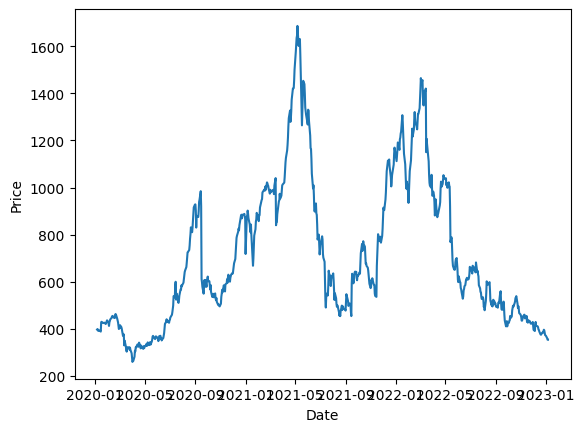

In [12]:
sns.lineplot(x='Date', y='Price', data=df)

Make it a little bigger

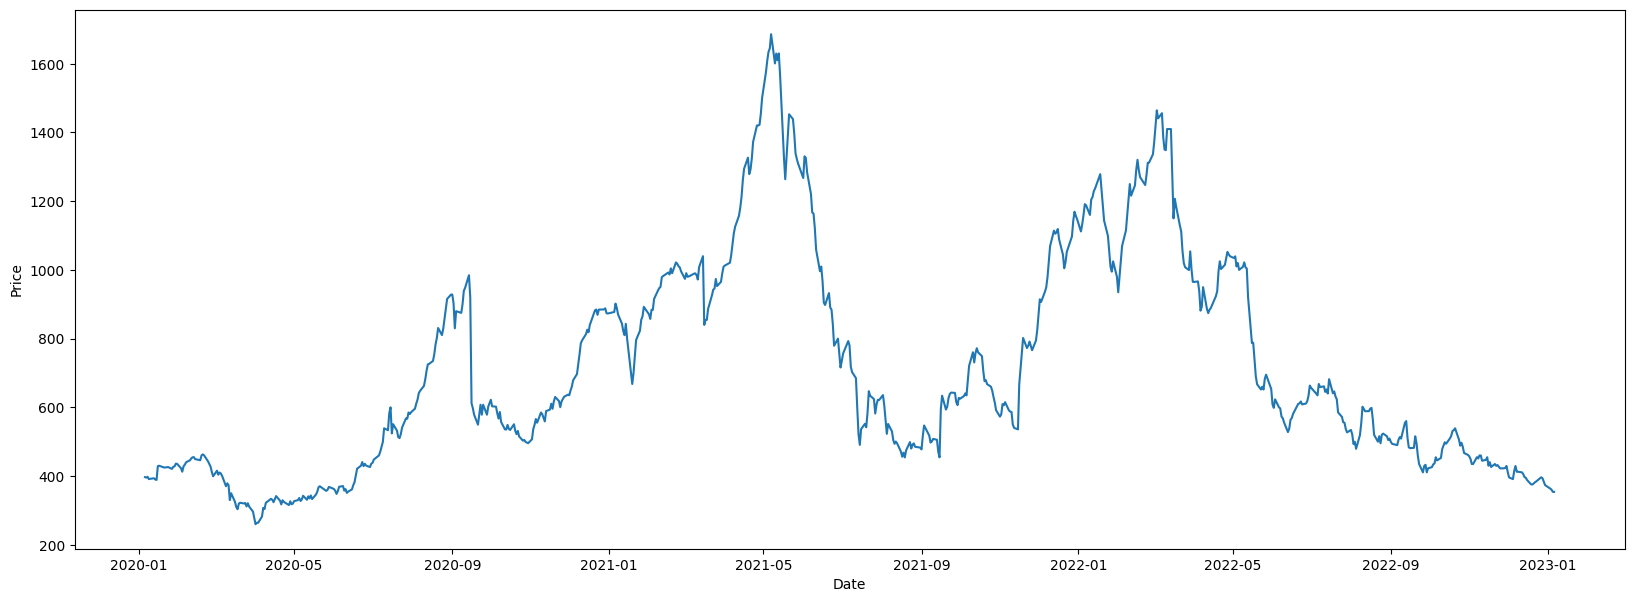

In [17]:
ax = sns.lineplot(x='Date', y='Price', data=df)
ax.figure.set_size_inches(20, 7)

From the plot, it looks like lumber prices have been generally increasing over time, with some ups and downs along the way.

Next steps: Now that we have a sense of the data, we can move on to building a linear regression model.
